Missing values:
Date              0
Instagram_Time    0
Weather           0



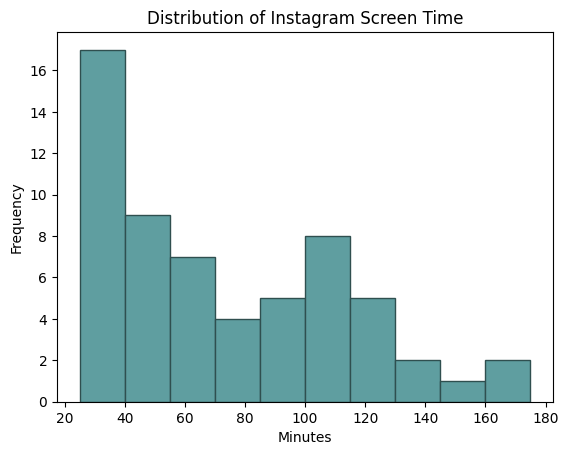

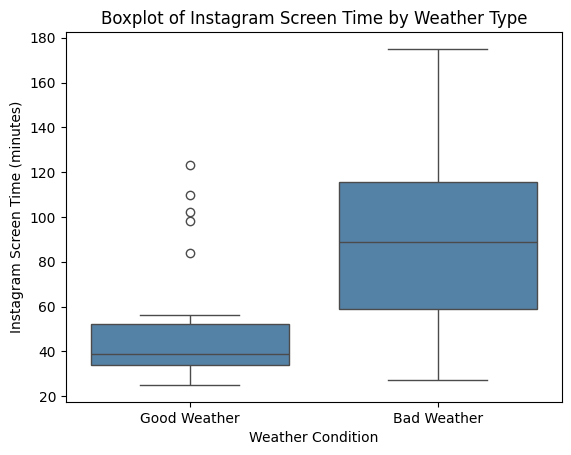

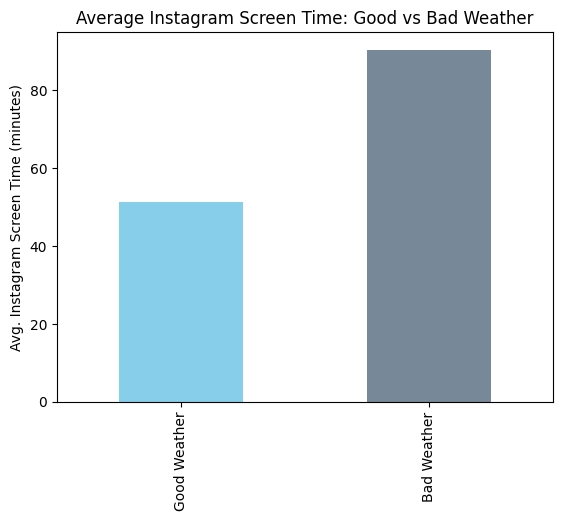



T-statistic: 4.52
P-value: 3.1e-05
We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.

Average Instagram usage for both weather groups:
Bad Weather Days Average: ~ 90.46 minutes
Good Weather Days Average: ~ 51.4 minutes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Reading excel file
df = pd.read_excel("dsa_data.xlsx")

# Naming columns
df.columns = ['Date', 'Instagram_Time', 'Weather']

# Data cleaning:
# Converting date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Checking for missing values
print("Missing values:")
print(df.isnull().sum().to_string())
print()
# Removing rows with missing values in Instagram_Time for accurate analysis
df = df.dropna(subset=['Instagram_Time'])

# Labeling bad weather
bad_weather = ['R', 'C', 'SNOWY', 'FOGGY']
df['IsBadWeather'] = df['Weather'].isin(bad_weather)

# Visualization: Histogram
plt.hist(df['Instagram_Time'], bins=10, color='cadetblue', edgecolor='darkslategrey') # Creating a histogram
plt.title("Distribution of Instagram Screen Time") # Title of graph
plt.xlabel("Minutes") # x-axis label
plt.ylabel("Frequency") # y-axis label
plt.savefig("histogram.png") # Saving the histogram as histogram.png
plt.show() # Displaying the plot
print()

# Visualization: Boxplot
sns.boxplot(x='IsBadWeather', y='Instagram_Time', data=df, color='steelblue') # Creating a boxplot
plt.title("Boxplot of Instagram Screen Time by Weather Type") # Title of graph
plt.xlabel("Weather Condition")  # x-axis label
plt.ylabel("Instagram Screen Time (minutes)")  # y-axis label
plt.xticks([0, 1], ['Good Weather', 'Bad Weather'])
plt.savefig("boxplot.png") # Saving the boxplot as boxplot.png
plt.show() # Displaying the plot
print()

# Visualization: Bar chart
means = df.groupby('IsBadWeather')['Instagram_Time'].mean() # Calculating the average Instagram time for each weather condition
means.index = ['Good Weather', 'Bad Weather'] # Naming index values
means.plot(kind='bar', color=['skyblue', 'lightslategrey']) # Plotting averages as bar chart
plt.title('Average Instagram Screen Time: Good vs Bad Weather') # Title of graph
plt.ylabel('Avg. Instagram Screen Time (minutes)') # y-axis label
plt.savefig("barchart.png") # Saving the bar chart as barchart.png
plt.show() # Displaying the plot
print()

# Hypothesis testing: Defining groups as bad and good
# Null hypothesis (H0): There is no significant difference in Instagram screen time between bad and good weather days.
# Alternative hypothesis (H1): Instagram screen time is significantly higher during bad weather days.
bad = df[df['IsBadWeather'] == True]['Instagram_Time']
good = df[df['IsBadWeather'] == False]['Instagram_Time']

# Independent t-test
t_stat, p_val = ttest_ind(bad, good, equal_var=False)
print("\nT-statistic:", round(t_stat, 2))
print("P-value:", round(p_val, 6))

# Interpreting the result
if p_val < 0.05:
    print("We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.")
else:
    print("We fail to reject Null Hypothesis. There is no significant difference in Instagram screen time between bad and good weather days.")

# Average Instagram usage for both weather groups
print("\nAverage Instagram usage for both weather groups:")
print("Bad Weather Days Average: ~", round(bad.mean(), 2),"minutes")
print("Good Weather Days Average: ~", round(good.mean(), 2),"minutes")

